# ESDP - Homework 2
Johanna Kasischke

## Jupyter notebook for downloading ERA5 humidity data and processing

In [ ]:
import cdsapi
import healpy as hp

c = cdsapi.Client()



2025-12-30 14:47:41,533 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


In [ ]:
### PARAMETER TO CHANGE ###

VARIABLE = ["specific_humidity"]
PRESSURE_LEVEL = ["300", "500", "800", "900", "975"]


In [ ]:

dataset = "reanalysis-era5-pressure-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": VARIABLE,
    "year": ["2024"],
    "month": ["12"],
    "day": [
        "01", "02", "03",
        "04", "05"
    ],
    "time": [
        "00:00", "06:00", "12:00",
        "18:00"
    ],
    "pressure_level": PRESSURE_LEVEL,
    "data_format": "netcdf",
    "download_format": "unarchived"
}

client = cdsapi.Client()

client.retrieve(dataset, request).download("era5_specific_humidity_20241201_20241205_6h_pl.nc")

2025-12-30 16:34:48,860 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-12-30 16:34:49,623 INFO Request ID is 0361f511-8a1d-4ba9-b323-47273a7ddf3f
2025-12-30 16:34:49,723 INFO status has been updated to accepted
2025-12-30 16:34:58,495 INFO status has been updated to running
2025-12-30 16:35:03,611 INFO status has been updated to successful


'era5_specific_humidity_20241201_20241205_6h_pl.nc'

In [24]:
# Try opening the retrieved data with xarray
import xarray as xr
ds = xr.open_dataset(output_filename, engine='netcdf4')
print(ds)

humidity = ds['q']

<xarray.Dataset> Size: 2MB
Dimensions:         (valid_time: 5, pressure_level: 5, latitude: 111,
                     longitude: 222)
Coordinates:
    number          int64 8B ...
  * pressure_level  (pressure_level) float64 40B 975.0 900.0 800.0 500.0 300.0
  * latitude        (latitude) float64 888B 89.38 87.75 86.12 ... -87.75 -89.38
  * longitude       (longitude) float64 2kB 0.0 1.625 3.25 ... 355.9 357.5 359.1
  * valid_time      (valid_time) datetime64[ns] 40B 2024-12-01 ... 2024-12-05
Data variables:
    q               (valid_time, pressure_level, latitude, longitude) float32 2MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-30T13:48 GRIB to CDM+CF via cfgrib-0.9.1...


In [10]:
# Let us inspect the time steps that we retrieved
#print(ds['valid_time'])
#ds.dims
#ds.coords
#ds.data_vars
#ds.attrs
#ds['q']

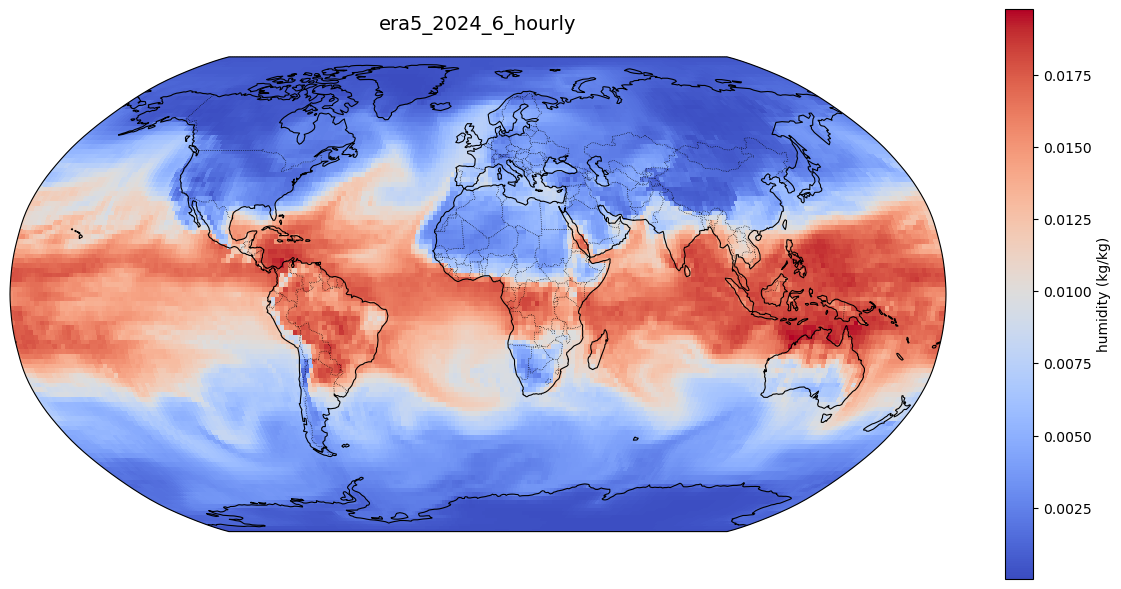

In [25]:
%matplotlib inline
# and produce a simple plot of the 1000 hPa temperature field
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select data for pressure level 1000 hPa (index 0, since pressure_level[0] = 1000.0)
t_data = humidity.sel(
    pressure_level=975,
    valid_time='2024-12-01T00:00:00'
)

# Create the plot with Robinson projection
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

# Plot the temperature field
cf = t_data.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # Data is in PlateCarree (lon/lat)
    cmap='coolwarm',
    cbar_kwargs={'label': 'humidity (kg/kg)'},
    add_colorbar=True,
    add_labels=False  # Avoid duplicate labels
)

# Set title
ax.set_title(output_filename, fontsize=14, pad=20)

# Add coastlines and country borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Set global view
ax.set_global()

# Improve layout
plt.tight_layout()

In [14]:
NSIDE = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 32 is 1.8 deg
